In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_excel('cleaned_dataset.xlsx')
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_9,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,Gerenciamento de riscos,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Gerenciamento de riscos,Gerenciamento de riscos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
metric_columns = [col for col in df.columns if col.startswith('metric_')]
metrics = df[metric_columns].stack().reset_index(drop=True)

metric_counts = metrics.value_counts()

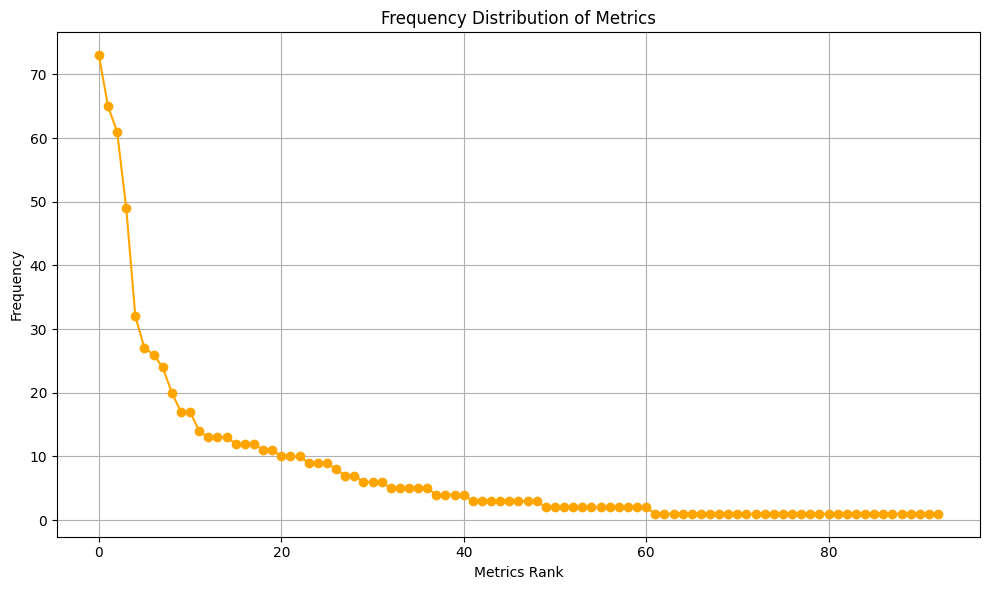

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# --------------------- Remoção por Frequencia ---------------------

# Definindo o limite de frequencia para identificar outliers
low_frequency_threshold = 4  

# Identificar métricas que são consideradas outliers com base na baixa frequencia
low_frequency_outliers = metric_counts[metric_counts <= low_frequency_threshold].index

low_frequency_outliers

Index(['Apdex', 'Turnover', 'Contact Rate', 'Funil', 'Delivery on time',
       'Disponibilidade do produto', 'Tempo melhorias', 'WIP', 'Aquisição',
       'DORA Metrics', 'Quantidade de alertas', 'Bugs density',
       'Planned hours', 'Time to recover', 'Cultura Organizacional', 'EBTDA',
       'Evolução de Produto', 'Tempo médio de recuperação', 'Metricas de uso',
       'BPS', 'Indicator about risky user stories', 'RAID',
       'Number of deployments', 'Backlog',
       'Quantidade de solicitações de clientes', 'Commit Review Performance',
       'Change failure rate', 'Role Time Measure', 'Pulse', 'Burn-up',
       'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceções', 'CES', 'Transações', 'EAC',
       'Rejected Product Backlog Items', 'Compliance', 'SRE', '9box',
       'Telas por sessão', 'Taxa de Retenção'

In [20]:
# Remover as métricas em low_frequency_outliers do dataset
df_cleaned = df[~df[metric_columns].isin(low_frequency_outliers).any(axis=1)]

df_cleaned.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_9,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Gerenciamento de riscos,Gerenciamento de riscos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,09:01:13,6,Scrum master,10 a 20,Grande empresa,"Telecomunicações, Governo, Financeiro, Constru...","Scrum, Kanban, Lean, Safe",Gerenciamento de riscos,"Gerenciamento de riscos, Métricas",Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


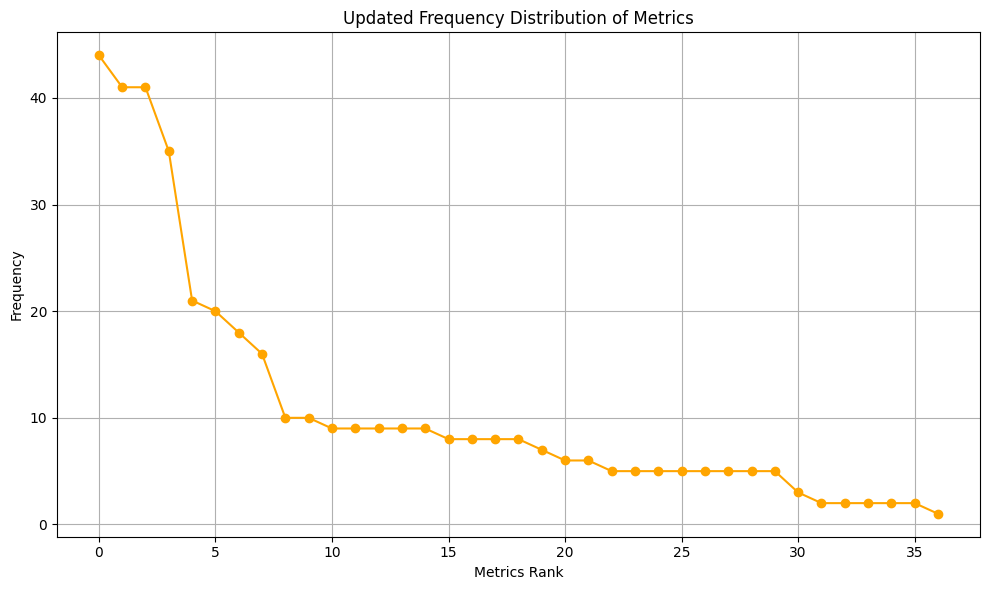

In [21]:
# Recalcular as frequências das métricas no DataFrame limpo
updated_metrics = df_cleaned[metric_columns].stack().reset_index(drop=True)
updated_metric_counts = updated_metrics.value_counts()

# Plotar o gráfico de frequência das métricas atualizado
plt.figure(figsize=(10, 6))
plt.plot(updated_metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Updated Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_cleaned.to_excel('updated_dataset.xlsx', index=False)